<a href="https://colab.research.google.com/github/alibagheribardi/Regression/blob/main/RegressionII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [5]:
df_train = pd.read_csv('sales_train.csv', index_col=0, parse_dates=['date']) # 2013,2014,2015, 2016
df_test = pd.read_csv('sales_test.csv', index_col=0, parse_dates=['date']) # 2017
df_train.head()

,date,sales
0,2013-01-01,13
1,2013-01-02,11
2,2013-01-03,14
3,2013-01-04,13
4,2013-01-05,10


,date,sales
0,2013-01-01,13
1,2013-01-02,11
2,2013-01-03,14
3,2013-01-04,13
4,2013-01-05,10


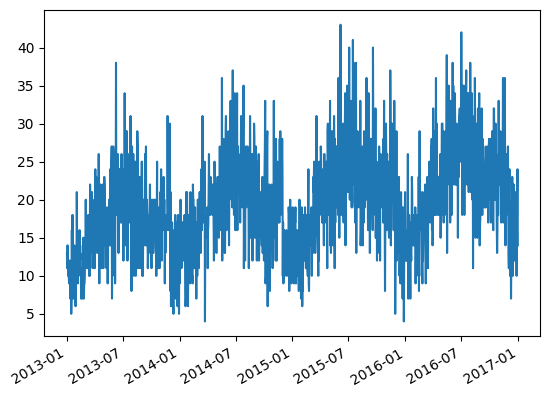

In [6]:
plt.plot(df_train.date , df_train.sales )
plt.gcf().autofmt_xdate()
plt.show()

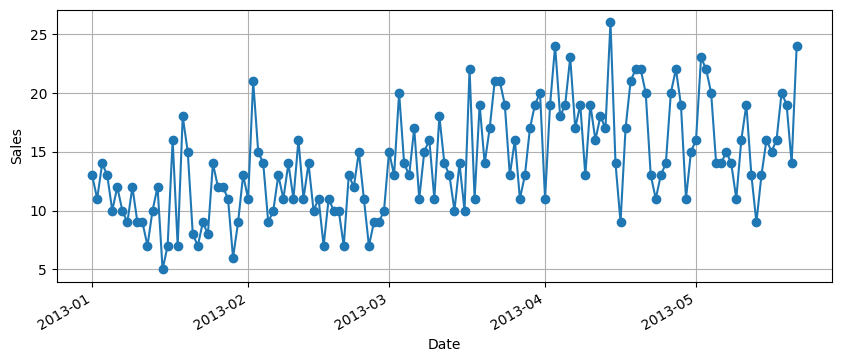

In [7]:
start_date = df_train.date.min()
end_date = start_date + pd.Timedelta(days=140)
df_filtered = df_train[(df_train.date >= start_date) & (df_train.date <= end_date)]
plt.figure(figsize=(10, 4))
plt.plot(df_filtered.date, df_filtered.sales, marker='o')
plt.gcf().autofmt_xdate()  # Auto-format the x-axis dates
#plt.title('Sales Over the Last 7 Days')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid()
plt.show()

Root Mean Squared Error (RMSE): 4.97
R-squared (R²): 0.43


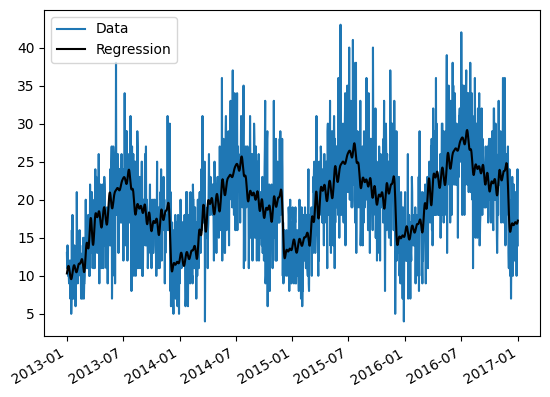

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df_train is already defined and contains 'date' and 'sales' columns

# Step 1: Prepare the data
train_times = df_train.index.values
constant = np.ones(len(train_times)).reshape(-1, 1)
cosines = np.stack([np.cos((i + 1) * 2 * np.pi * train_times / 365) for i in range(30)], axis=1)
sines = np.stack([np.sin((i + 1) * 2 * np.pi * train_times / 365) for i in range(30)], axis=1)
train_features = np.concatenate([constant, train_times.reshape(-1, 1), cosines, sines], axis=1)

# Step 2: Fit the Linear Regression Model
lr = LinearRegression()
lr.fit(train_features, df_train.sales)

# Step 3: Make Predictions
lr_train_preds = lr.predict(train_features)

# Step 4: Compute RMSE and R²
rmse = np.sqrt(mean_squared_error(df_train.sales, lr_train_preds))  # Root Mean Squared Error
r2 = r2_score(df_train.sales, lr_train_preds)  # R-squared score

# Print the error metrics
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Step 5: Visualize the Results
plt.plot(df_train.date, df_train.sales, label='Data')
plt.plot(df_train.date, lr_train_preds, 'k', label='Regression')
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()

Root Mean Squared Error (RMSE): 9.68
R-squared (R²): 0.90


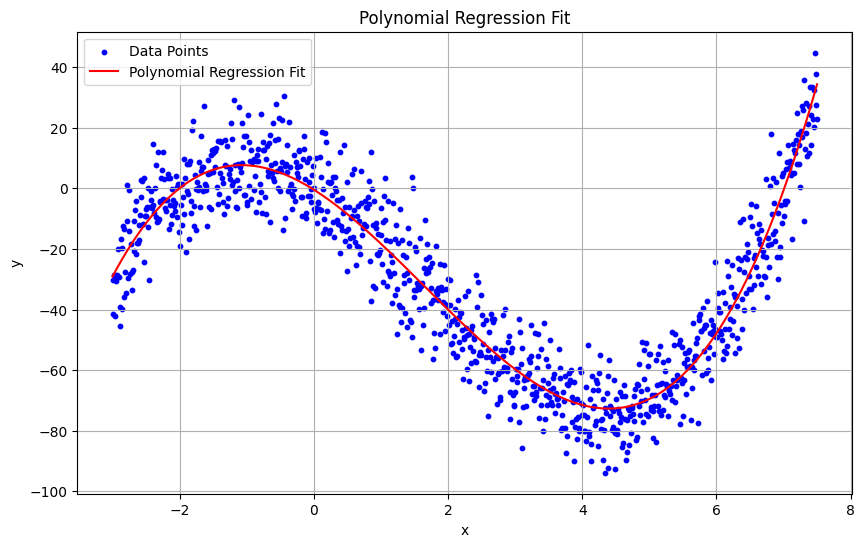

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Generate Data
x = np.linspace(-3, 7.5, 1000)  # 1000 points from -3 to 7.5
y = (x - 7) * (x + 2) * x + 10 * np.random.randn(1000)  # Polynomial function with noise

# Step 2: Create Polynomial Features
poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(x.reshape(-1, 1))  # Transform x into polynomial features

# Step 3: Fit a Polynomial Regression Model
model = LinearRegression()
model.fit(X_poly, y)  # Fit the model to the polynomial features and target variable

# Step 4: Make Predictions
y_pred = model.predict(X_poly)  # Predict using the fitted model

# Step 5: Compute RMSE and R²
rmse = np.sqrt(mean_squared_error(y, y_pred))  # Root Mean Squared Error
r2 = r2_score(y, y_pred)  # R-squared score

# Print the error metrics
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Step 6: Visualize the Results
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', s=10, label='Data Points')  # Original data points
plt.plot(x, y_pred, color='red', label='Polynomial Regression Fit')  # Predicted polynomial curve
plt.title('Polynomial Regression Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

Root Mean Squared Error (RMSE): 9.71
R-squared (R²): 0.85


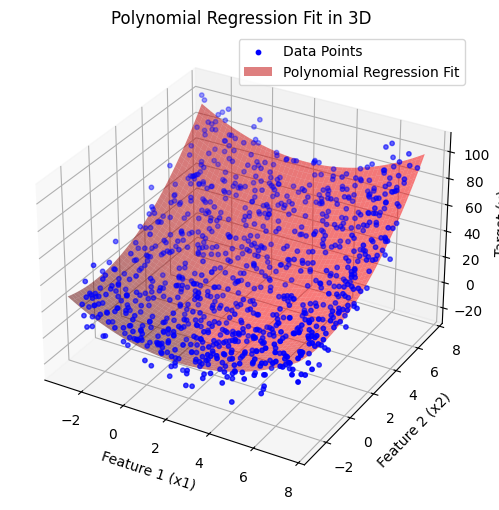

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Generate Data
np.random.seed(0)  # For reproducibility
n_samples = 1000
x1 = np.random.uniform(-3, 7.5, n_samples)  # First feature
x2 = np.random.uniform(-3, 7.5, n_samples)  # Second feature
# Create a target variable with some polynomial relationship and noise
y = (x1 - 2) ** 2 + (x2 + 1) ** 2 + 10 * np.random.randn(n_samples)

# Step 2: Create Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(np.column_stack((x1, x2)))  # Transform x1 and x2 into polynomial features

# Step 3: Fit a Polynomial Regression Model
model = LinearRegression()
model.fit(X_poly, y)  # Fit the model to the polynomial features and target variable

# Step 4: Make Predictions
y_pred = model.predict(X_poly)  # Predict using the fitted model

# Step 5: Compute RMSE and R²
rmse = np.sqrt(mean_squared_error(y, y_pred))  # Root Mean Squared Error
r2 = r2_score(y, y_pred)  # R-squared score

# Print the error metrics
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Step 6: Visualize the Results
# Since we have two features, we can visualize the predictions in a 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the original data points
ax.scatter(x1, x2, y, color='blue', s=10, label='Data Points')

# Create a grid to plot the polynomial surface
x1_grid, x2_grid = np.meshgrid(np.linspace(-3, 7.5, 100), np.linspace(-3, 7.5, 100))
X_grid = poly.transform(np.column_stack((x1_grid.ravel(), x2_grid.ravel())))
y_grid = model.predict(X_grid).reshape(x1_grid.shape)

# Plot the polynomial regression surface
ax.plot_surface(x1_grid, x2_grid, y_grid, color='red', alpha=0.5, label='Polynomial Regression Fit')

ax.set_title('Polynomial Regression Fit in 3D')
ax.set_xlabel('Feature 1 (x1)')
ax.set_ylabel('Feature 2 (x2)')
ax.set_zlabel('Target (y)')
ax.legend()
plt.show()